In [5]:
rm(list=ls())
library(susieR)
data(N3finemapping)
attach(N3finemapping)

In [6]:
ls()

[1] "N3finemapping"

In [7]:
names(N3finemapping)

[1] "X"                 "chrom"             "pos"              
[4] "true_coef"         "residual_variance" "Y"                
[7] "allele_freq"       "V"

In [8]:
dim(X)

[1]  574 1001

In [9]:
names(N3finemapping)

[1] "X"                 "chrom"             "pos"              
[4] "true_coef"         "residual_variance" "Y"                
[7] "allele_freq"       "V"

In [11]:
dim(X)

[1]  574 1001

In [12]:
dim(Y)

[1] 574   2

In [8]:
y = Y[,1]
b = true_coef[,1]

In [9]:
which(b != 0)

[1] 403 653 773

In [10]:
sumstats <- univariate_regression(X, y)

In [11]:
z_scores <- sumstats$betahat / sumstats$sebetahat
log10p <- -log10(pchisq(z_scores^2,1,lower.tail=F))

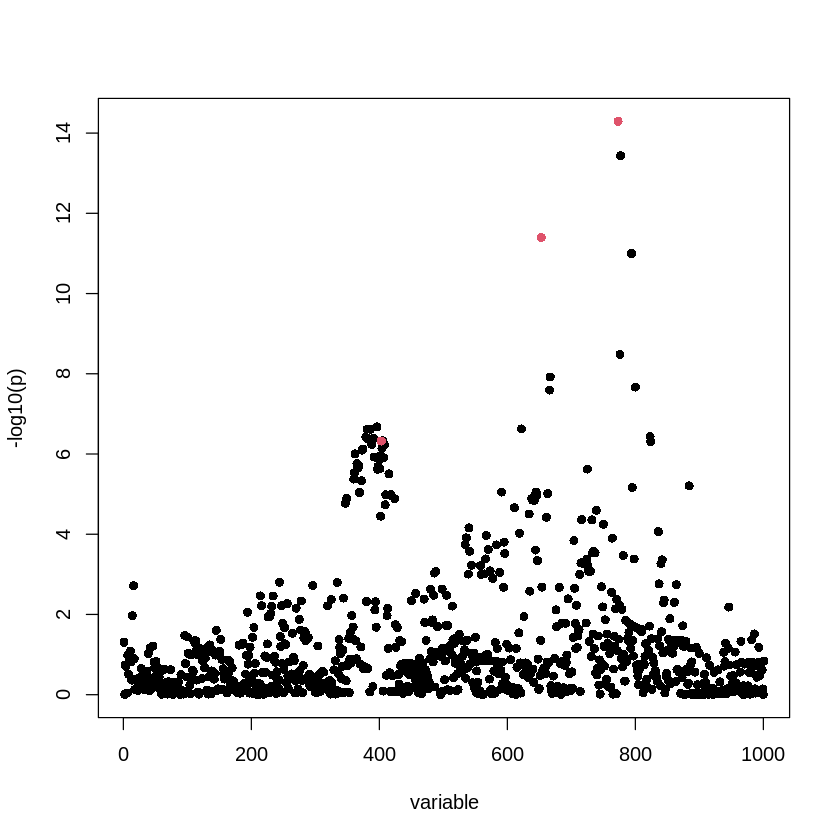

In [12]:
susie_plot(z_scores,y="z",b=b)

In [46]:
log10p <- -log10(pchisq(z_scores^2,1,lower.tail=F))

In [15]:
lliks = sapply(1:ncol(X), function(i) logLik(lm(y~X[,i])))

In [16]:
lliks = lliks - max(lliks)
probs = exp(lliks)/sum(exp(lliks))

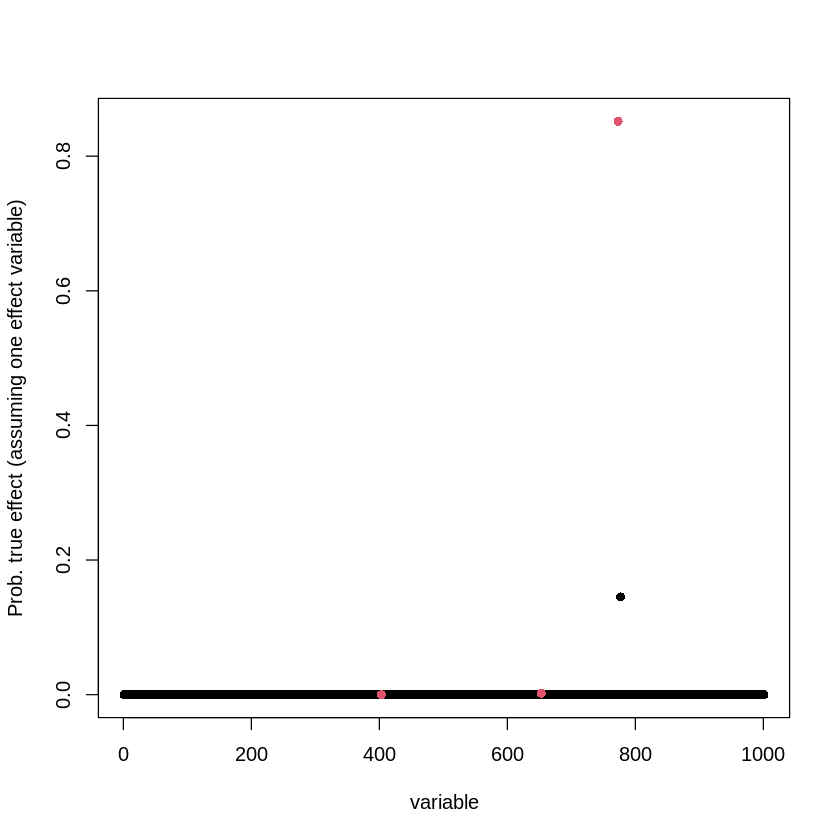

In [17]:
susie_plot(probs, y="PIP", b=b, ylab = "Prob. true effect (assuming one effect variable)")

In [27]:
which(susieR:::in_CS(t(probs), coverage = 0.95) != 0)

[1] 773 777

In [45]:
install.packages("Rfast")

also installing the dependencies ‘RcppGSL’, ‘RcppZiggurat’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [48]:
fitted <- susie(X, y, L = 10)

In [32]:
print(fitted$sets)

$cs
$cs$L2
[1] 653

$cs$L1
[1] 773 777

$cs$L3
 [1] 362 365 372 373 374 379 381 383 384 386 387 388 389 391 392 396 397 398 399
[20] 400 401 403 404 405 407 408 415


$purity
   min.abs.corr mean.abs.corr median.abs.corr
L2    1.0000000     1.0000000       1.0000000
L1    0.9815726     0.9815726       0.9815726
L3    0.8686309     0.9640176       0.9720711

$cs_index
[1] 2 1 3

$coverage
[1] 0.9998235 0.9988860 0.9539806

$requested_coverage
[1] 0.95



In [33]:
sets <- susie_get_cs(fitted, X = X, coverage = 0.9)
print(sets)

$cs
$cs$L2
[1] 653

$cs$L1
[1] 773 777

$cs$L3
 [1] 373 374 379 381 383 384 386 387 388 389 391 392 396 398 399 400 401 403 404
[20] 405 407 408


$purity
   min.abs.corr mean.abs.corr median.abs.corr
L2    1.0000000     1.0000000       1.0000000
L1    0.9815726     0.9815726       0.9815726
L3    0.9119572     0.9726283       0.9765888

$cs_index
[1] 2 1 3

$coverage
[1] 0.9998235 0.9988860 0.9119908

$requested_coverage
[1] 0.9



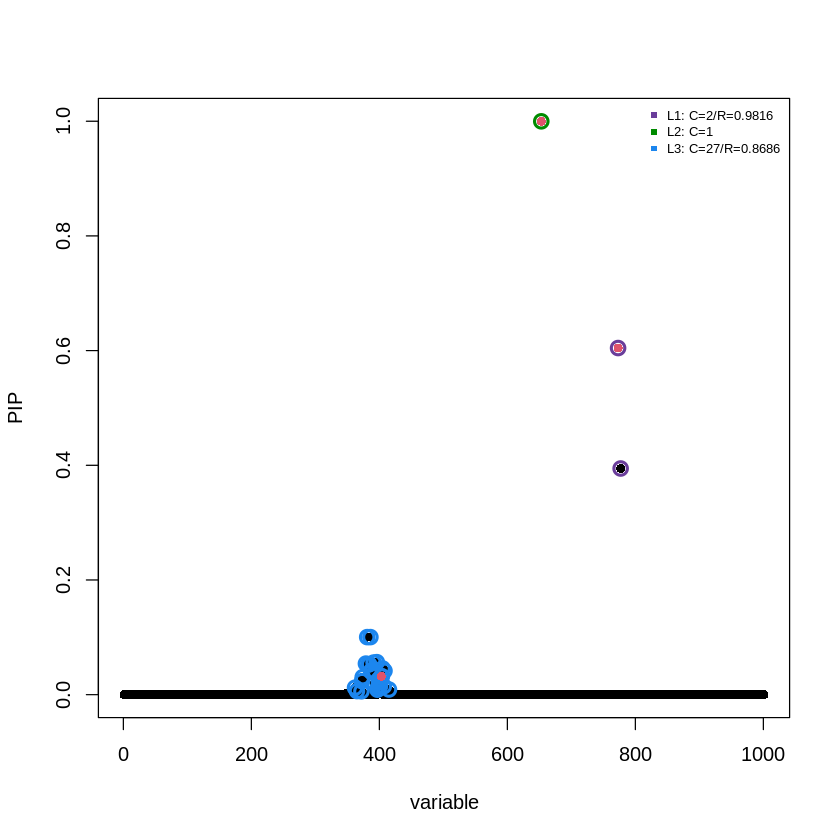

In [34]:
susie_plot(fitted, y="PIP", b=b, add_legend=T)

In [35]:
i  <- fitted$sets$cs$L3
z3 <- cbind(i,log10p[i],fitted$pip[i])
colnames(z3) <- c('position', '-log10 pvalue', 'PIP')
z3[order(z3[,2], decreasing = TRUE),]

position,-log10 pvalue,PIP
396,6.676732,0.056703668
381,6.618518,0.100361522
386,6.618518,0.100361522
379,6.417587,0.054178766
391,6.396640,0.055951500
383,6.370810,0.052896562
384,6.370810,0.052896562
389,6.360493,0.042160946
405,6.331181,0.045761845
403,6.322861,0.031992514


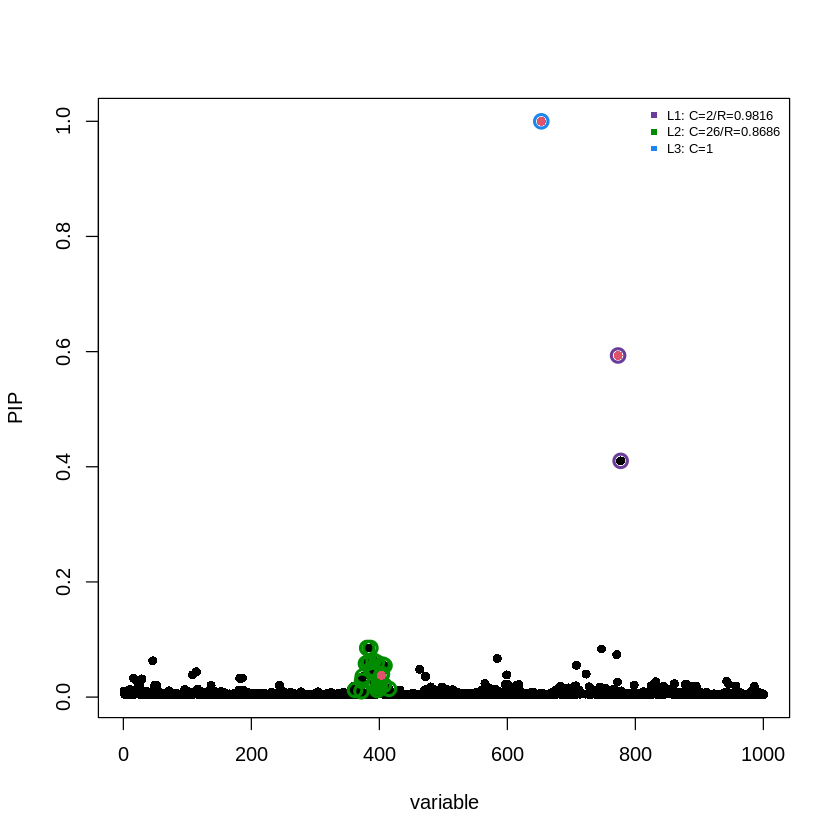

In [49]:
fitted2 = susie(X, y, L = 10, estimate_prior_variance = FALSE, scaled_prior_variance = 0.2)
susie_plot(fitted2, y='PIP', b=b, add_legend=T)

In [50]:
R <- cor(X)

In [57]:
n=1001
print(n)

[1] 1001


In [58]:
fitted_rss <- susie_rss(z_scores, R, L = 10)

ERROR: Error in if (nrow(R) != p) stop(paste0("The dimension of R (", nrow(R), : argument is of length zero


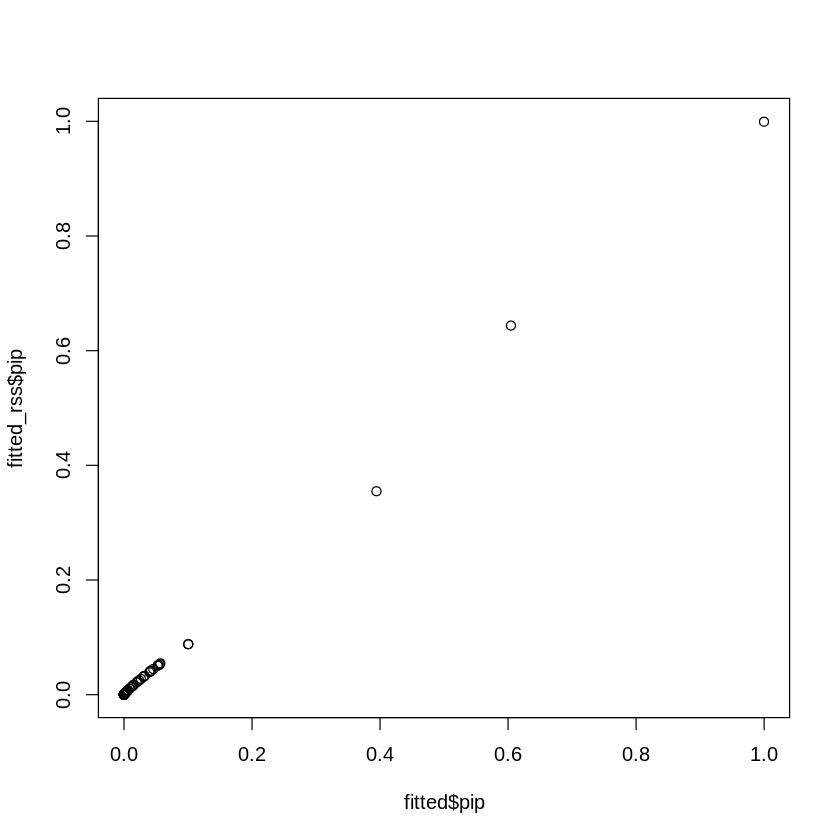

In [44]:
plot(fitted$pip, fitted_rss$pip, ylim=c(0,1))

In [59]:
set.seed(1234)
tmp = matrix(rnorm(500*1001), 500, 1001)
eigenR = eigen(R)
eigenR$values[eigenR$values < 1e-10] = 0
X_ref = tmp %*% (eigenR$values * t(eigenR$vectors))
R_ref = cor(X_ref)

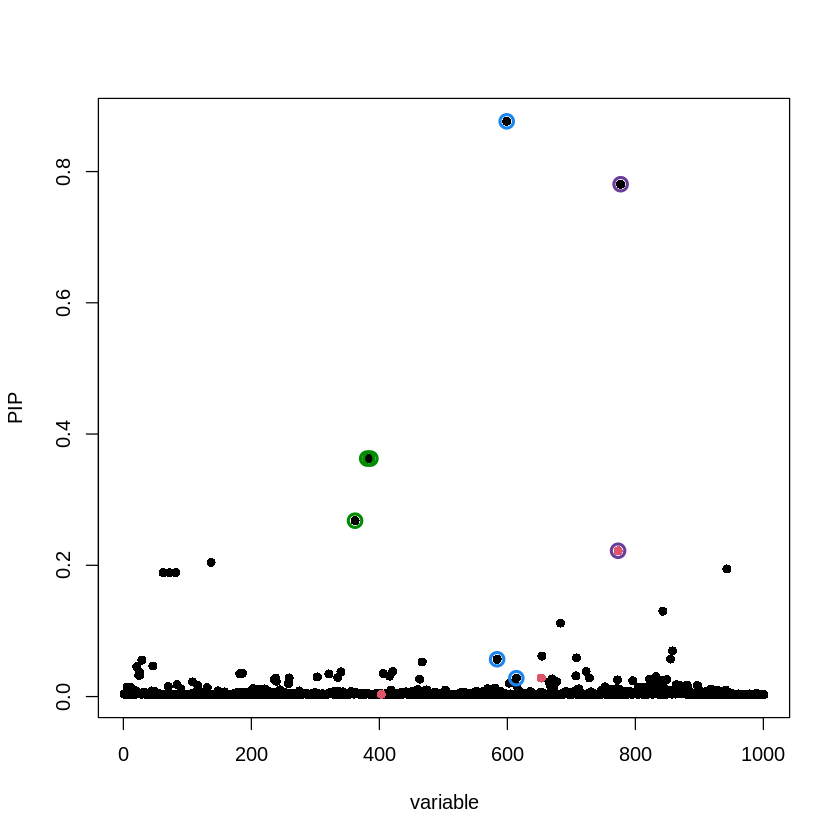

In [60]:
fitted_rss_ref <- susie_rss(z_scores, R_ref, L = 10)
susie_plot(fitted_rss_ref, y="PIP", b=b)

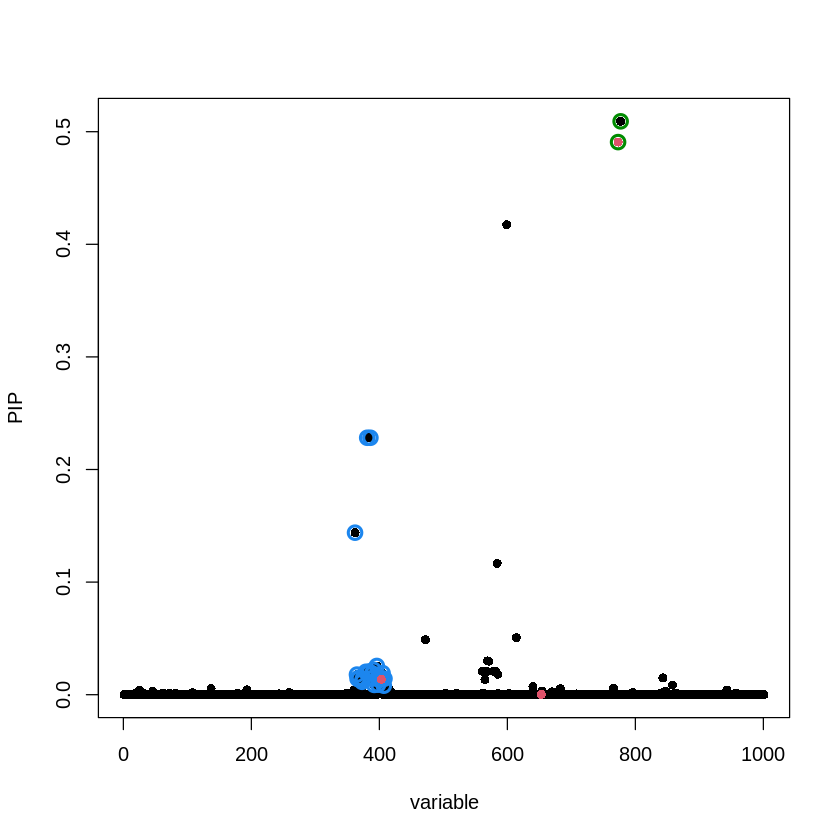

In [61]:
n_ref = 500
fitted_rss_ref_corrected <- susie_rss(z_scores, R_ref, z_ld_weight = 1/n_ref, L = 10)
susie_plot(fitted_rss_ref_corrected, y="PIP", b=b)

In [62]:
data(N2finemapping)

In [63]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 23.04

Matrix products: default
BLAS/LAPACK: /home/h3africa/micromamba/envs/pisces-rabbit/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Africa/Bamako
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] susieR_0.12.35

loaded via a namespace (and not attached):
 [1] mixsqp_0.3-48      crayon_1.5.2       vctrs_0.6.3        cli_3.6.1         
 [5] rlang_1.1.1        RcppZiggurat_0.1.6 jsonlite_1.8.7     glue_1.6.2     